# Testing for sc_london

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
from matplotlib.pyplot import *
from numpy import *
from positive import *

(positive)>> Applying custom matplotlib settings.


In [393]:

#
s = -2
l,m = 12,3

#
a = 0.98
cw,Aref = leaver( a, l, m, s=s )

print Aref

[148.66105185+0.21673769j]


In [394]:
#
Aleaver = sc_leaver( a*cw,l,m,s )

#
print Aleaver

((149.87297366719233+0.19043572732420572j), array([-160.51847448,    0.3341127 ]), False,     fjac: array([[-0.99750178, -0.07064127],
       [ 0.07064127, -0.99750178]])
     fun: array([-3.23352456e-15, -6.20163643e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.84101527e-16, 2.75493430e-14])
       r: array([-0.06662865,  0.00212268, -0.06751043])
  status: 1
 success: True
       x: array([149.87297367,   0.19043573]))


In [395]:
#
Alondon = sc_london( a*cw,l,m,s )

#
print Alondon

((149.87297366692513+0.1904357275107022j), array([-160.51847448,    0.3341127 ]), False,     fjac: array([[-0.99750179, -0.07064114],
       [ 0.07064114, -0.99750179]])
     fun: array([-1.18308141e-15,  4.72712147e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([6.26769936e-15, 2.67192350e-14])
       r: array([-0.06662871,  0.00212238, -0.06751039])
  status: 1
 success: True
       x: array([149.87297367,   0.19043573]))


In [396]:
print Aref-Alondon[0]
print abs(a*cw)

[-1.21192182+0.02630196j]
2.8734948652319345


# Testing for slmy

(sc_leaver!)>> retry! needed in sc_leaver
(sc_leaver!)>> retry! needed in sc_leaver


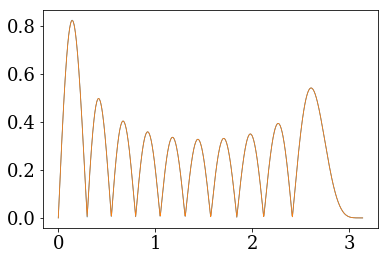

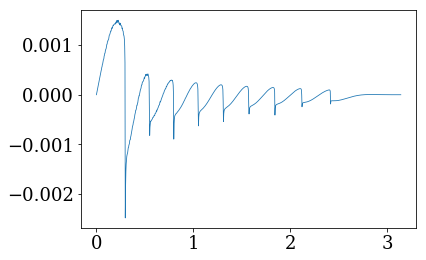

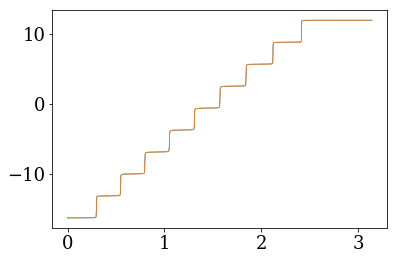

In [397]:

theta = linspace(0,pi,1024)
phi = 0
Sa = slmy( a*cw, l,m, theta, phi,s=s )

Sb = slm(None,l,m,0,theta,phi,s=s,aw=a*cw,use_nr_convention=False)

plot( theta, abs(Sa) )
plot( theta, abs(Sb) )
figure()
plot( theta, abs(Sa)-abs(Sb) )
figure()
plot( theta, unwrap(angle(Sa))-mean(unwrap(angle(Sa))) )
plot( theta, unwrap(angle(Sb))-mean(unwrap(angle(Sb))) )

# Related testing for slm_sequence functions

In [398]:
ll,mm = 13,8
b1 = slm_sequence_backwards(a*cw,ll,mm,s=s)
b2 = slm_sequence_forwards(a*cw,ll,mm,s=s)
b3 = slm_sequence(a*cw,ll,mm,s=s)

In [399]:
lvals = sort(b1.keys())
print lvals
print sort(b2.keys())
print sort(b3.keys())

[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]


In [400]:
c1,c2,c3 = [],[],[]
for k in lvals:
    c1.append( b1[k] )
    c2.append( b2[k] )
    c3.append( b3[k] )
c1 = array(c1)
c2 = array(c2)
c3 = array(c3)

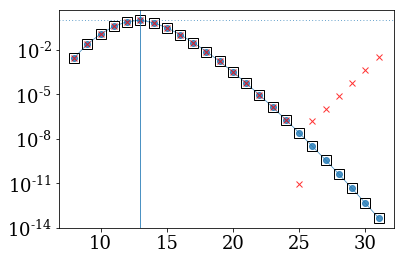

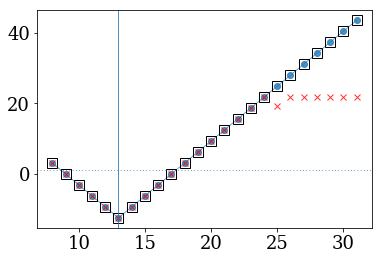

In [401]:
plot( lvals, abs(c1), '-o', alpha=0.8 )
plot( lvals, abs(c2), 'xr', alpha=0.8 )
plot( lvals, abs(c3), 'sk', ms=10, mfc='none' )
yscale('log')
axvline( ll )
axhline(1,ls=':')

figure()
plot( lvals, unwrap(angle(c1)), '-o', alpha=0.8 )
plot( lvals, unwrap(angle(c2)), 'xr', alpha=0.8 )
plot( lvals, unwrap(angle(c3)), 'sk', ms=10, mfc='none' )
# yscale('log')
axvline( ll )
axhline(1,ls=':')

# Test the related first order approximant

In [402]:
def linapprox_slm(s,l,m,gamma,theta,phi):
    
    #
    from scipy import sqrt
    
    #
    (s_,l_,m_) = [ x for x in (s,l,m) ]
    (s,l,m) = [ float(x) for x in (s,l,m) ]
    
    #
    clm1 = lambda l,m,s: (s*sqrt(((l**2 - m**2)*(l**2 - s**2.0))/(-1 + 4*l**2)))/l**2 
    clp1 = lambda l,m,s: -((s*sqrt((((1.0 + l)**2 - m**2)*((1 + l)**2 - s**2))/(-1 + 4*(1 + l)**2)))/(1 + l)**2)

    
    #
    Yp1 = sYlm(s_,l_+1,m_,theta,phi) if (abs(m)<=(l+1)) and ((l+1)>=abs(s)) else 0
    Ym1 = sYlm(s_,l_-1,m_,theta,phi) if (abs(m)<=(l-1)) and ((l-1)>=abs(s)) else 0
    ans = sYlm(s_,l_,m_,theta,phi) + gamma * ( clp1(l, m, s)*Yp1+clm1(l, m, s)*Ym1 )
    

    #
    c = sqrt(prod(ans,ans,theta))
    ans = ans/c
    
    #
    return ans

In [403]:
#
def cm1(aw,k,m,s):
    return (aw*(1 + s)*sqrt((k**2 - m**2)*(k**2 - s**2)))*1.0/(k**2*sqrt(-1 + 4*k**2))

#
def cp1(aw,k,m,s):
    return -((aw*(1 + s)*sqrt(((3 + 2*k)*(1 + 2*k + k**2 - m**2)*(1 + 2*k + k**2 - s**2))*1.0/(1 + 2*k)))*1.0/((1 + k)**2*(3 + 2*k)))

#
def apple(th,aw,k,m,s):
    
    #
    from numpy import arccos
    
    S0 = linapprox_slm(s,k,m,aw,th,0)
    
    bm1 = -((sqrt(k - m)*sqrt(k + m)*(k - s)**(3*1.0/2)*sqrt(k + s))*1.0/(k**2*sqrt(-1 + 2*k)*sqrt(1 + 2*k)))
    bp1 = (sqrt((3 + 2*k)*1.0/(1 + 2*k))*((3 + 5*k + 2*k**2)*sqrt(1 + k - m)*sqrt(1 + k + m)*(k - s)*sqrt(1 + k - s)*sqrt(1 + k + s) - (1 + k)*(1 + 2*k)*(3 + 2*k)*sqrt((1 + 2*k + k**2 - m**2)*(1 + 2*k + k**2 - s**2))))*1.0/((1 + k)**3*(3 + 2*k)**2)
    S1 = exp(aw*u) * ( sYlm(s,k,m,th,0,leaver=True) + aw*( bm1*sYlm(s,k-1,m,th,0,leaver=True) + bp1*sYlm(s,k+1,m,th,0,leaver=True) ) )
    
    S2 = slmy( aw, k,m, theta, phi,s=s ) # slm( None, k,m,0,arccos(u),0,s=s,aw=aw,london=-4,use_nr_convention=False )
    
    S0 = S0/sqrt(prod(S0,S0,th))
    S1 = S1/sqrt(prod(S1,S1,th))
    S2 = S2/sqrt(prod(S2,S2,th))
    
    return S0,S1,S2

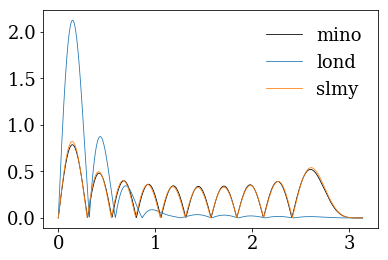

In [404]:
u = cos(theta)
aa,ll,mm = a,l,m
S0,S1,S2 = apple( theta, aa*cw, ll,mm,s )
plot( theta, abs(S0), color='k', label='mino' )
plot( theta, abs(S1), label='lond' )
plot( theta, abs(S2), label='slmy' )
legend()

# Test the related analytic approximant

In [405]:

#
def mu(u,k,s,m):
    if (k!=m) and (k!=s):
        return (m*s*(-(k*(1 + k)) + s))*1.0/(k**2*(1 + k)**2) - u
    else:
        return -(((1 + k + s)*(m*s + (1 + k)**2*u))*1.0/((1 + k)**2*(1 + 2*k)))
    
#
def nu0(k,s,m):
    if (k!=m) and (k!=s):
        return s*1.0/(k*(1 + k))
    else:
        return (1 + k + s)*1.0/((1 + k)*(1 + 2*k))
    
#
def thetap( u,aw,k,s,m ):
    from numpy import arccos,arctanh
    return arccos( tanh(  aw*nu0(k,s,m)+arctanh(u)  ) )

#
def kiwi( th,aw,k,s,m ):
    from numpy import exp,cos
    u = cos(th)
    S1 = exp( aw * u ) * exp( aw*mu(u,k,s,m) ) * sYlm( s, k, m, thetap(u,aw,k,s,m), 0, leaver=True )
    S2 = slmy( aw, k,m, th, phi,s=s ) # slm( None, k,m,0,arccos(u),0,s=s,aw=aw,london=-4,use_nr_convention=False )
    th = arccos(u)
    S0 = linapprox_slm(s,k,m,aw,th,0)
    S0 = S0/sqrt(prod(S0,S0,th))
    S1 = S1/sqrt(prod(S1,S1,th))
    S2 = S2/sqrt(prod(S2,S2,th))
    return S0,S1,S2

In [406]:
u = cos(theta)
ll,mm = l,m
S0,S1,S2 = kiwi( theta, a*cw, ll,s,mm )

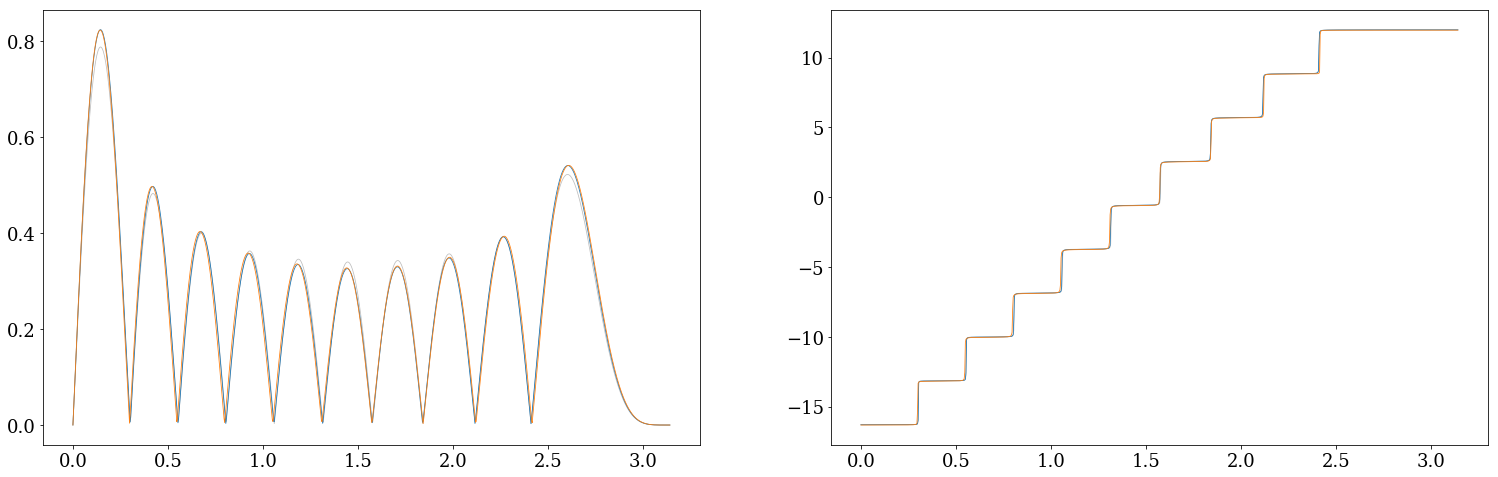

In [407]:
figure( figsize=2*figaspect(0.618/2) )

subplot(1,2,1)
plot( theta, abs(S0), color='k', label='mino',alpha=0.25,ls='-' )
plot( theta, abs(S1) )
plot( theta, abs(S2) )
# plot( theta, abs(sYlm(s,ll,mm,theta,0)) )

subplot(1,2,2)
plot( theta, unwrap(angle(S0))-mean(unwrap(angle(S0))), color='k', label='mino',alpha=0.25,ls='-' )
plot( theta, unwrap(angle(S1))-mean(unwrap(angle(S1))) )
plot( theta, unwrap(angle(S2))-mean(unwrap(angle(S2))) )